<a href="https://colab.research.google.com/github/PBelle451/PizzaDataScience/blob/main/Pizza_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 16,4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/pizza.csv")
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [ ]:
print(df.dtypes)

Unnamed: 0      int64
X               int64
id             object
date           object
time           object
name           object
size           object
type           object
price         float64
dtype: object


In [ ]:
le_name = LabelEncoder()
le_size = LabelEncoder()
le_type = LabelEncoder()

In [ ]:
df['name'] = le_name.fit_transform(df['name'])
df['size'] = le_size.fit_transform(df['size'])
df['type'] = le_type.fit_transform(df['type'])

In [ ]:
X = df[['name', 'size', 'price']]
y = df['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Prediction: {y_pred}")
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Prediction: [0 0 2 ... 1 0 1]

Accuracy: 0.4588179923351039

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.49      0.48      3275
           1       0.52      0.63      0.57      4417
           2       0.42      0.51      0.46      3583
           3       0.35      0.16      0.22      3598

    accuracy                           0.46     14873
   macro avg       0.44      0.45      0.43     14873
weighted avg       0.44      0.46      0.44     14873


Confusion Matrix:
 [[1613  643 1019    0]
 [ 381 2799  415  822]
 [ 607  889 1829  258]
 [ 880 1089 1046  583]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


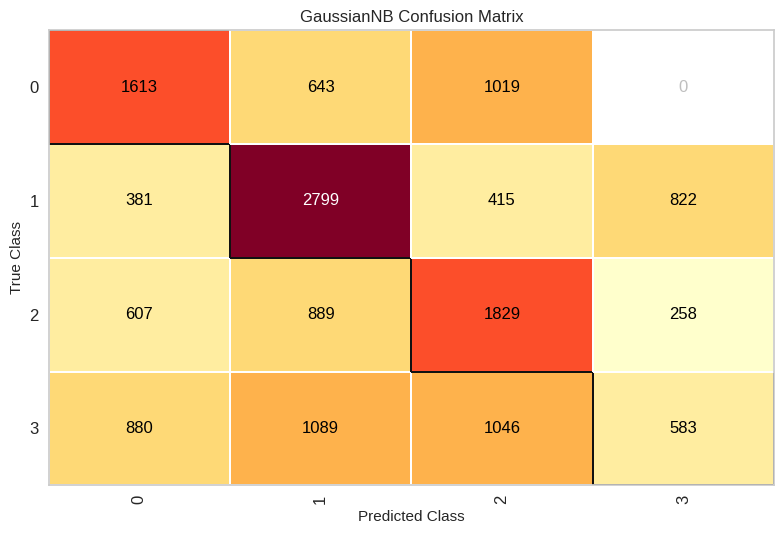

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
new_pizza = pd.DataFrame({
    'name': ['hawaiian'],
    'size': ['L'],
    'price': [12],
})
new_pizza['name'] = le_name.transform(new_pizza['name'])
new_pizza['size'] = le_size.transform(new_pizza['size'])
prediction = model.predict(new_pizza)
print(f"Prediction: {le_type.inverse_transform(prediction)}")

Prediction: ['classic']
